In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Renaming columns
col=['house_id', 'sale_date', 'price', 'bedrooms', 'bathrooms', 'home_measure',
       'lot_measure', 'floors', 'coast_view', 'viewed', 'overall_condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area']

In [3]:
#importing the dataset
innercity_df= pd.read_csv("innercity.csv",names=col,skiprows=1)
innercity_df.head()

,house_id,sale_date,price,bedrooms,bathrooms,home_measure,lot_measure,floors,coast_view,viewed,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
# obtaining general information on the provided dataset
innercity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
house_id             21613 non-null int64
sale_date            21613 non-null object
price                21613 non-null int64
bedrooms             21613 non-null int64
bathrooms            21613 non-null float64
home_measure         21613 non-null int64
lot_measure          21613 non-null int64
floors               21613 non-null float64
coast_view           21613 non-null int64
viewed               21613 non-null int64
overall_condition    21613 non-null int64
quality              21613 non-null int64
ceil_measure         21613 non-null int64
basement             21613 non-null int64
yr_built             21613 non-null int64
yr_renovated         21613 non-null int64
zipcode              21613 non-null int64
lat                  21613 non-null float64
long                 21613 non-null float64
living_measure15     21613 non-null int64
lot_measure15        21613 non-null int64


In [5]:
innercity_df.isnull().sum() #no NaN or missing values

house_id             0
sale_date            0
price                0
bedrooms             0
bathrooms            0
home_measure         0
lot_measure          0
floors               0
coast_view           0
viewed               0
overall_condition    0
quality              0
ceil_measure         0
basement             0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
living_measure15     0
lot_measure15        0
furnished            0
total_area           0
dtype: int64

In [6]:
innercity_df.shape

(21613, 23)

> There are 23 features and 21613 rows in this dataset. 
> There are no null values in the data.

> Many values though labeled as numerical have categorical properties

> Some noticable anomalies

room_bed/bedroom : 13 houses have 0 bedrooms

romm_bath/bathroom : 10 houses have 0 bathrooms

Sight/times viewed : 19489 houses sold without having been viewed once.--unusual


In [7]:
#making a copy of the original dataframe for futher modifications to it.
df_copy = innercity_df.copy(deep=True)

In [8]:
#quick check to see if the copy was successful
df_copy.head(1)

,house_id,sale_date,price,bedrooms,bathrooms,home_measure,lot_measure,floors,coast_view,viewed,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477


In [9]:
df_copy.shape #copy successful

(21613, 23)

In [10]:
#dropping house id as it does not contribute much to the analysis
df_copy=df_copy.drop(columns=['house_id'],axis=1)

In [11]:
#formating the sale date to the appropriate data type
df_copy['sale_date']=pd.to_datetime(df_copy['sale_date']) 

In [12]:
#checking to see if the changes have been made
df_copy.head()

,sale_date,price,bedrooms,bathrooms,home_measure,lot_measure,floors,coast_view,viewed,overall_condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,2014-11-07,808100,4,3.25,3020,13457,1.0,0,0,5,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,2014-12-04,277500,4,2.50,2550,7500,1.0,0,0,3,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,2015-04-20,404000,3,2.50,2370,4324,2.0,0,0,3,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,2014-05-29,300000,2,1.00,820,3844,1.0,0,0,4,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,2015-04-24,699000,2,1.50,1400,4050,1.0,0,0,4,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


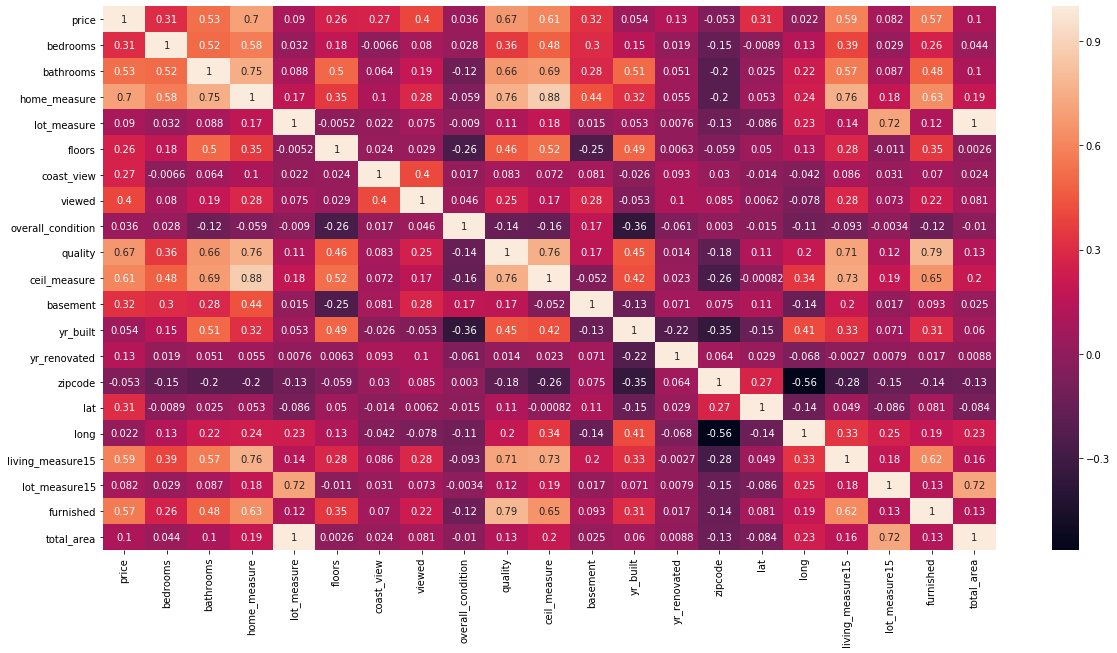

In [13]:
# obtaining a heatmap for the entire data set before the data types are changed
cor1 = df_copy.corr()
fig, ax = plt.subplots(figsize= (20, 10))
sns.heatmap(cor1, annot= True)

In [14]:
#Correlation with output variable
cor_target = abs(cor1["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price               1.000000
bathrooms           0.525134
home_measure        0.702044
quality             0.667463
ceil_measure        0.605566
living_measure15    0.585374
furnished           0.565991
Name: price, dtype: float64

In [15]:
#The following features are categorical in nature, hence the data type is being converted to suit the same:
df_copy['coast_view']=pd.Categorical(df_copy.coast_view)
df_copy['furnished']=pd.Categorical(df_copy.furnished)#both of these attributes, have categorical results hence converted to categorical data type
df_copy['overall_condition']=pd.Categorical(df_copy.overall_condition)
df_copy['quality']=pd.Categorical(df_copy.quality)
df_copy['floors']=pd.Categorical(df_copy.floors)
df_copy['viewed']=pd.Categorical(df_copy.viewed)
df_copy['zipcode']=pd.Categorical(df_copy.zipcode)

# Some insights gained from the sale date
 > temporary columns added to the analysis, will be removed later on

In [16]:
import datetime as dt

In [17]:
df_copy.sale_date.min() #first data entry

Timestamp('2014-05-02 00:00:00')

In [18]:
df_copy.sale_date.max() #last data entry

Timestamp('2015-05-27 00:00:00')

In [19]:
df_copy.sale_date.max()-df_copy.sale_date.min() #total days of data provided to us

Timedelta('390 days 00:00:00')

In [20]:
df_copy['Year']=df_copy.sale_date.dt.year #assiging a temporary column featuring just the year

In [21]:
df_copy['Weekday']=df_copy.sale_date.dt.weekday #assiging a temporary column featuring just the weekday

In [22]:
df_copy['month']=df_copy.sale_date.dt.month #assiging a temporary column featuring just the month

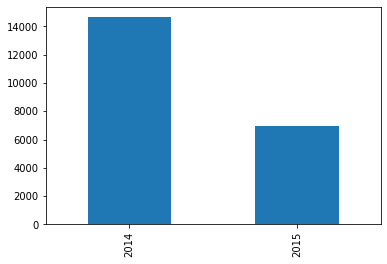

In [23]:
df_copy.Year.value_counts().plot(kind='bar')

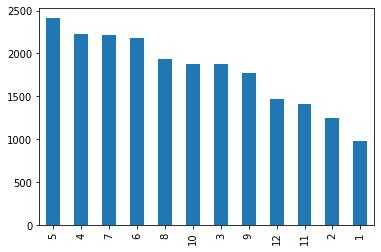

In [24]:
df_copy.month.value_counts().plot(kind='bar')

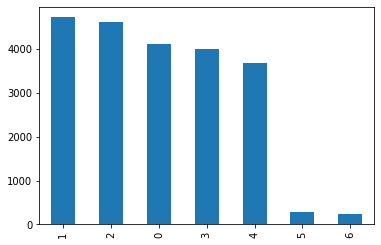

In [25]:
df_copy.Weekday.value_counts().plot(kind='bar')

> dayhours column has date value. dayhours shows that the house sales data is for years 2014 and 2015.
> data available for 2nd May 2014-27th May 2015
> 14633 records are of year 2014 and
> 6980  records are of year 2015 ,as is visible on the bar chart above

> A record of 390 days.

> And 2014 has more data than 2015 which implies that reality sales happen double in 'May to Dec' than 'Jan to May'. 
 This is just assumption and need to confirm with business analyst after checking on complete data from both years.

> 0 being a Sunday , most sales were made on a Weekday. Weekends - Friday and Saturday showing the least sales

In [26]:
#dropping temporary features as specified
df_copy=df_copy.drop(columns=['month','Weekday'],axis=1)

# We will keep the Year feature to extract the age to see if age affects the target variable, in this case, price

In [27]:
df_copy['age'] = df_copy['Year']-df_copy['yr_built']

In [28]:
df_copy.describe().transpose() #a statistical summary of only the numerical variables

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
home_measure,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
lot_measure,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
ceil_measure,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03
basement,21613.0,291.509045,442.575043,0.0000,0.000,0.0000,560.000,4.820000e+03
yr_built,21613.0,1971.005136,29.373411,1900.0000,1951.000,1975.0000,1997.000,2.015000e+03
yr_renovated,21613.0,84.402258,401.679240,0.0000,0.000,0.0000,0.000,2.015000e+03
lat,21613.0,47.560053,0.138564,47.1559,47.471,47.5718,47.678,4.777760e+01


Most features have vast differences between the mean and the median

In [29]:
# Segregating the features based on their data type for the ease of observation
numerical_features=df_copy.select_dtypes(include=['number']);
categorical_features=df_copy.select_dtypes(include=['category']);
datetime_feature=df_copy.select_dtypes(include=['datetime']);

In [30]:
print('numerical_features.columns: ',numerical_features.columns);
print('number of numerical_features: ', len(numerical_features.columns))
print('*'*50)
print('categorical_features.columns: ',categorical_features.columns);
print('number of categorical_features: ', len(categorical_features.columns))
print('*'*50)
print('datetime_feature.columns: ',datetime_feature.columns);
print('number of datetime features:', len(datetime_feature.columns))

numerical_features.columns:  Index(['price', 'bedrooms', 'bathrooms', 'home_measure', 'lot_measure',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'Year', 'age'],
      dtype='object')
number of numerical_features:  16
**************************************************
categorical_features.columns:  Index(['floors', 'coast_view', 'viewed', 'overall_condition', 'quality',
       'zipcode', 'furnished'],
      dtype='object')
number of categorical_features:  7
**************************************************
datetime_feature.columns:  Index(['sale_date'], dtype='object')
number of datetime features: 1


# Observing distributions in numerical features

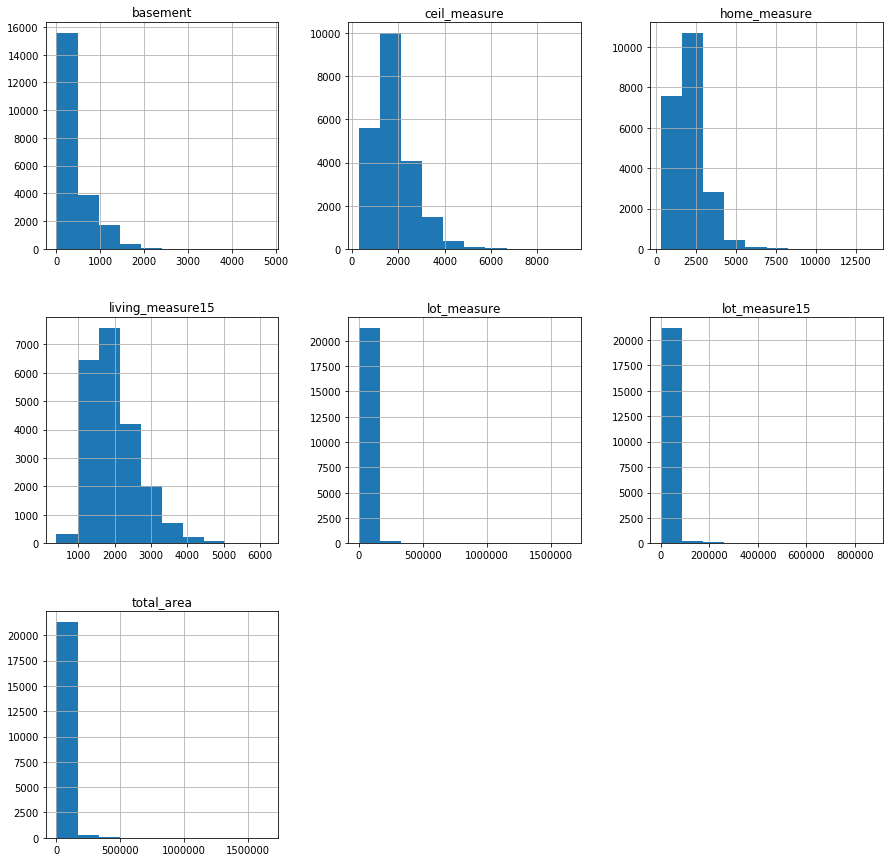

In [31]:
numerical_features.hist(column=['home_measure','basement','living_measure15','lot_measure','lot_measure15','ceil_measure','total_area'],figsize=(15,15));

As histogram also confirms that data in the features are not normally distributed. There are many peaks in it.

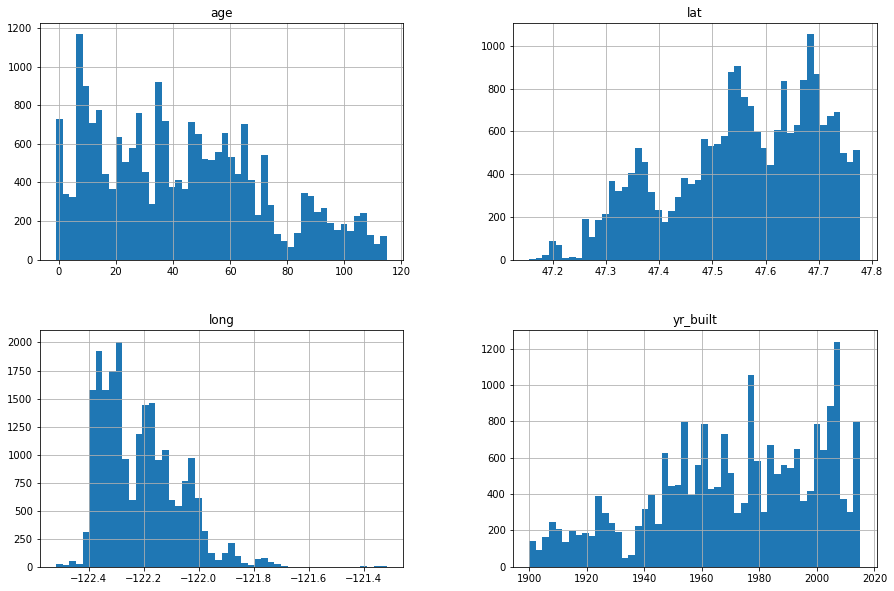

In [32]:
numerical_features.hist(column=['yr_built','lat','long','age'],figsize=(15,10),bins=50);

OBSERVATIONS ON YEAR IT WAS BUILT AND THE AGE :
> the houses available on sale have a wide distribution of ages:

  some not even 1 year old,
  
  Most 8 years old 
  
  some as old as 120 years.
  
  I.e., homes built in the 1900's to as new as 2015

(0, 2000)

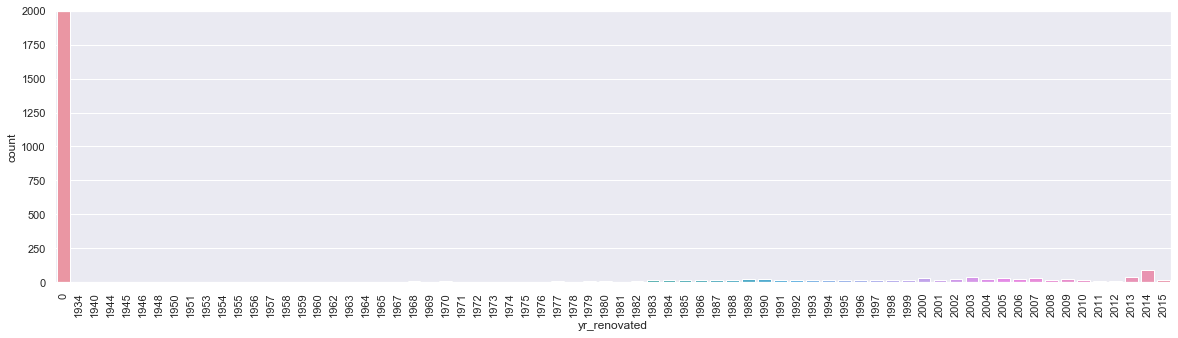

In [33]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='yr_renovated',data=df_copy,)
plt.xticks(rotation=90)
plt.ylim(0,2000)

> 95% of the homes in this dataset have not been renovated.

> Although renovations can be observed from 1970s onwards to 2015.

>Renovated homes were the ones built in the 1900s

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

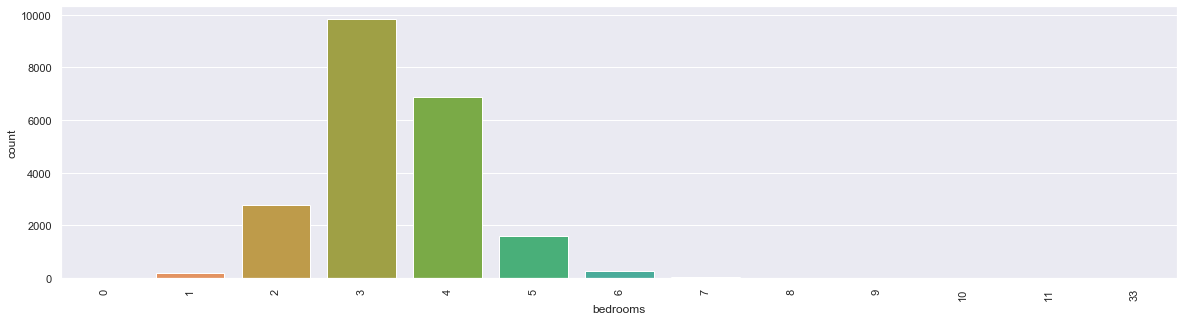

In [34]:
sns.countplot(x='bedrooms',data=df_copy);
plt.xticks(rotation=90)

Average number of bedrooms in order of 3>4>2>5...

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

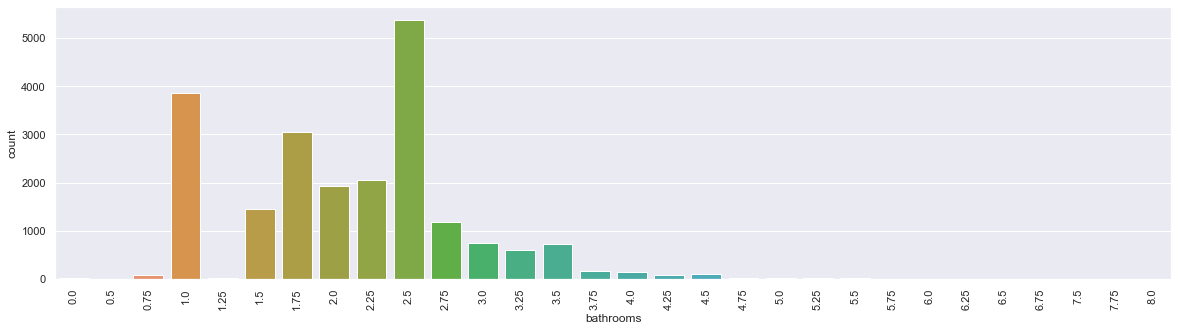

In [35]:
sns.countplot(x='bathrooms',data=df_copy)
plt.xticks(rotation=90)

Most houses have a number of bathrooms in the descending order : 2.5>1>1.75...

# OBSERVING DISTRIBUTIONS IN CATEGORICAL FEATURES

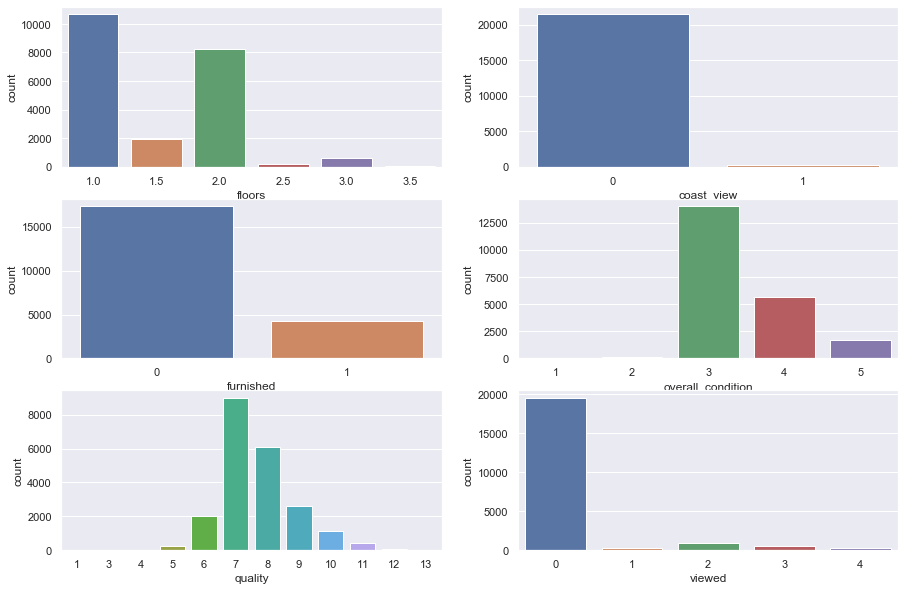

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.countplot(x='floors',data=df_copy,ax=axes[0,0]),
sns.countplot(x='coast_view',data=df_copy,ax=axes[0,1]),
sns.countplot(x='furnished',data=df_copy,ax=axes[1,0]),
sns.countplot(x='overall_condition',data=df_copy,ax=axes[1,1])#ordinal categorical variable
sns.countplot(x='quality',data=df_copy,ax=axes[2,0])#ordinal
sns.countplot(x='viewed',data=df_copy,ax=axes[2,1])

As clearly seen,
There are imbalances in the data provided here for the categorical features.
The model may perform better for values provided more in number but may not do so well with values less in quantity in the respective features provided.

# SOME OBSERVATIONS FROM THE AVAILABLE GEOSPATIAL DATA

S:\Users\hari1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


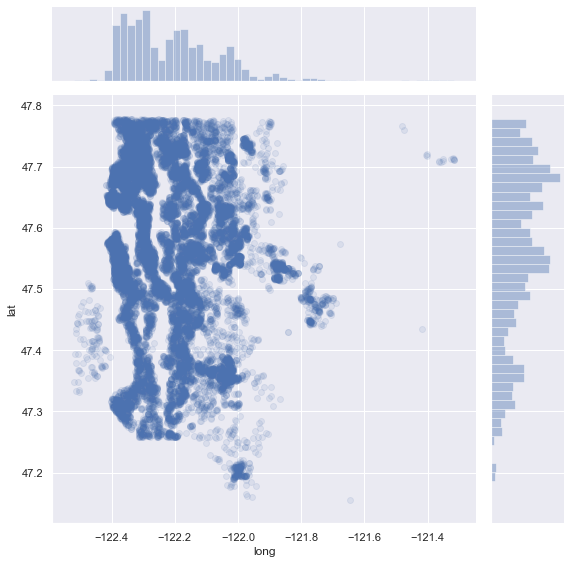

In [37]:
sns.jointplot(kind='scatter',x=df_copy.long,y=df_copy.lat,size=8,alpha=0.1)

> Interesting latitude values : 47.8-47.3

> Interesting longitude values : between -122.4 and -122.2

> The density denotes that most houses have been bought in the regions marked as interesting

In [38]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
%matplotlib inline

In [39]:
df_geo = pd.DataFrame.spatial.from_xy(df_copy, 'long','lat')

In [40]:
gis = GIS()

In [41]:
#visualizing spatial distribution by price
geo_map = gis.map('Seattle, WA')
geo_map.basemap = 'streets'
geo_map

MapView(layout=Layout(height='400px', width='100%'))

In [115]:
df_geo.spatial.plot(map_widget = geo_map, 
                      renderer_type='c', # for classs breaks renderer
                     method='esriClassifyNaturalBreaks',  # classification scheme
                     class_count=10,  # between 1900 - 2000, each decade in a class
                     col='price',
                     cmap='Set3',  # matplotlib color map   --->change color
                     alpha=0.8,
                     outline_color=[0,0,0,0])
#Re-run this code for the hue to appear on the map above

True

>As depicted in the map:

Yellow indicates pricier/costlier properties.

It is interesting to note that most of the costly properties are neighbouring a waterfront, or at situated very close to it.(that is only about 0.7% of the homes in the provided dataset)

# Plotting the distribution on the target variable

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

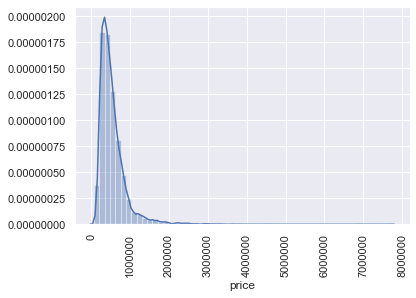

In [43]:
#plotting the distribution of the target variable 'price'
sns.distplot(df_copy.price,bins=56) 
plt.xticks(rotation = 90)

#target variable has a positive skew

> Target feature shows that price data is not normally distributed.

> There are more records for house prices below 10,00,000.

# Relationship between Price and categorical variables 

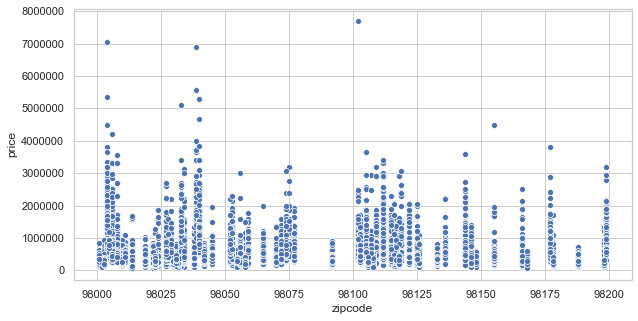

In [44]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style(style="whitegrid")
sns.scatterplot(x='zipcode',y='price',data=df_copy)

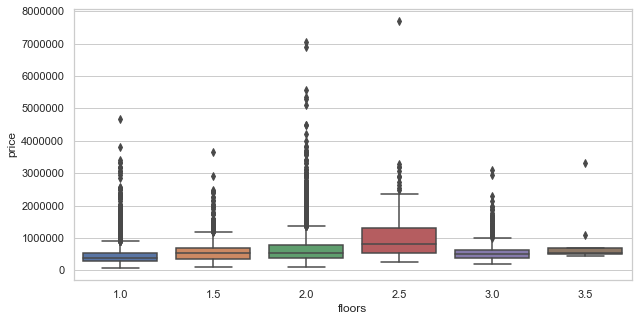

In [45]:
sns.boxplot(x='floors',y='price',data = df_copy)

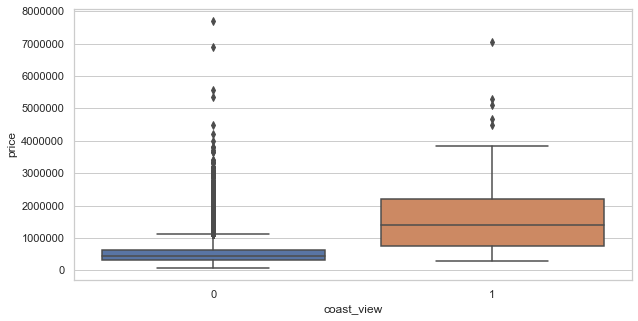

In [46]:
sns.boxplot(x='coast_view',y='price',data = df_copy)

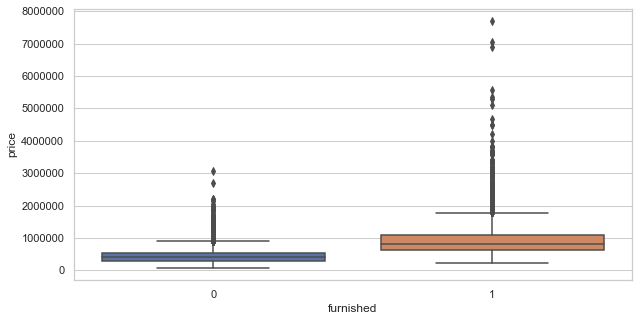

In [47]:
sns.boxplot(x='furnished',y='price',data = df_copy)

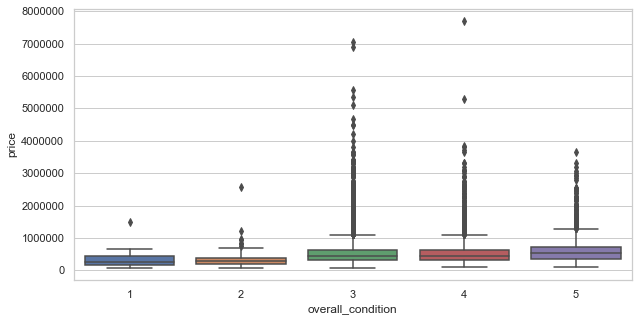

In [48]:
sns.boxplot(x='overall_condition',y='price',data = df_copy)

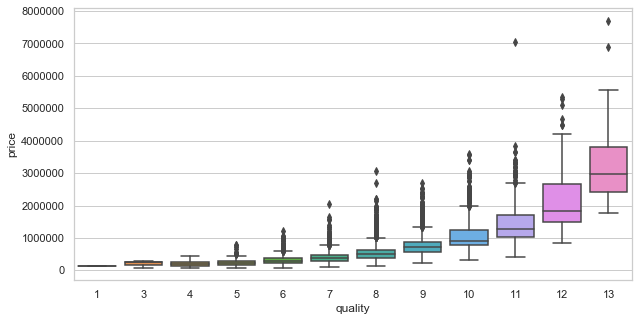

In [49]:
sns.boxplot(x='quality',y='price',data = df_copy)

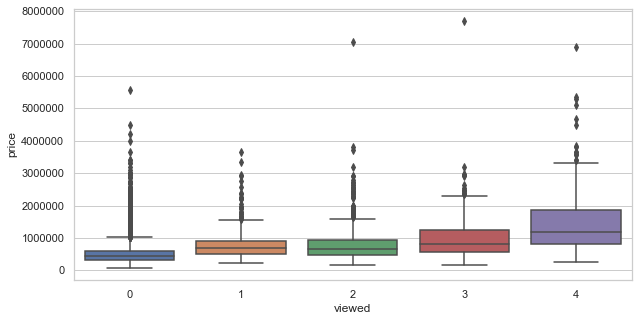

In [50]:
sns.boxplot(x='viewed',y='price',data = df_copy)

OBSERVATIONS :

> ZIPCODES : All the zipcodes display similarity in the price range of houses in their locality:

> But costlier homes can be bought in zipcodes ranging from 98000-98039

> FLOORS : 
  Price is not affected to a great extent with respect to the number of floors as the median values of the floors have similar   values.
 
> COAST VIEW : 
  observably, houses with a coast view lean towards a higher price range
 
> FURNISHED : 
  furnishing does not seem to be deciding factor on the price of the house.

> OVERALL_CONDITION : 
  houses with varied ratings on the overall conditions seem to fall on the same price range, thus not affecting the pricing.

> VIEWED :
  price does not seem to wary very much based on the times it was viewed, although it appears that costlier houses were viewed   a lot of times before having been bought.

> QUALITY :
  The quality rating has shown a great influence on the price as, houses with higher rating have been sold for high prices.
  A direct relationship.

# Outlier treatment on the numeric features

BEDROOMS AND BATHROOMS

> BATHROOMS:

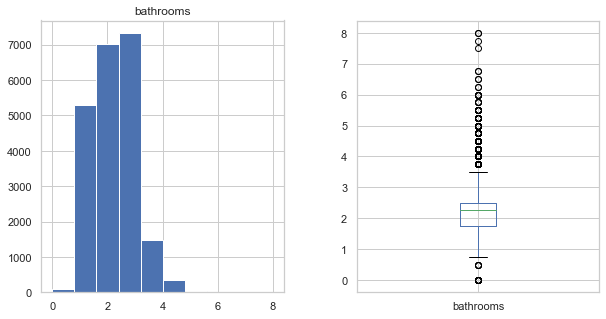

In [51]:
fig, axs = plt.subplots(1, 2)
df_copy.hist(column=['bathrooms'],ax = axs[0]);
df_copy.boxplot(column=['bathrooms']);

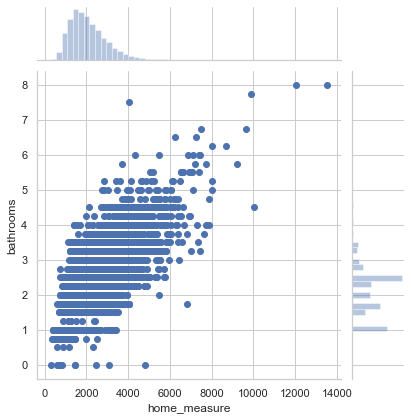

In [52]:
sns.jointplot(x='home_measure',y = 'bathrooms',data = df_copy, kind = 'scatter')

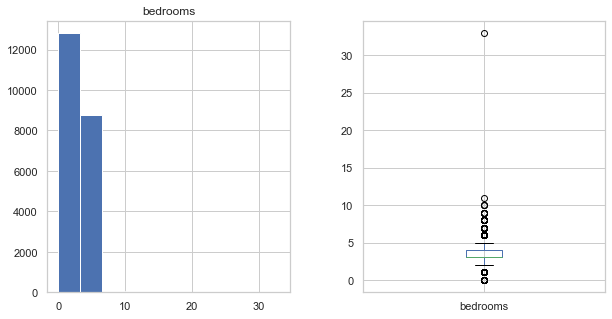

In [53]:
fig, axs = plt.subplots(1, 2)
df_copy.hist(column=['bedrooms'],ax = axs[0]);
df_copy.boxplot(column=['bedrooms']);

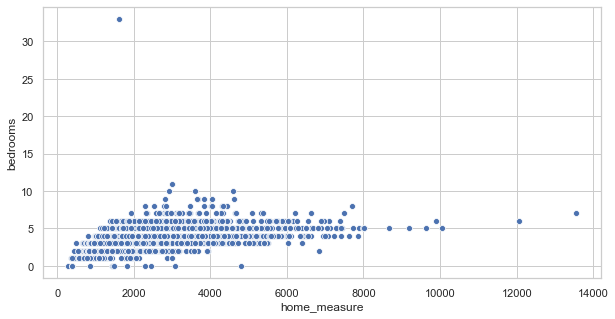

In [54]:
sns.scatterplot(x='home_measure',y = 'bedrooms',data = df_copy)

ANOMALIES WITH BEDROOM AND BATHROOM SO FAR:

BATHROOMS :
> HIGHLY UNLIKELY THAT THERE CAN BE 0 BATHROOMS

> HIGHLY UNLIKELY THAT THERE CAN BE 8 BATHROOMS IN A HOUSE WITH A 4000sqft. HOME MEASURE

BEDROOMS :

> 33 BEDROOMS IN A HOUSE IS A ANOMALY

> HIGHLY UNLIKELY THAT A 4000 SQUARE FEET HOUSE CAN HAVE 10 BEDROOMS, also a 2000 sq ft. cannot have 33 bedrooms

> BEDROOMS AND BATHROOMS GREATER THAN 10 CAN BE REPLACED WITH A MEDIAN , because it is higly unlikely that houses with such less square foot will have so many bedrooms and bathrooms

# TREATING OUTLIERS IN BEDROOM AND BATHROOM
replacing the extreme values with median as most entries clearly appear to be anomalies

In [55]:
for i in df_copy.columns[:]:
    if df_copy[i].name in('bathrooms','bedrooms','home_measure','living_measure15','lot_measure','lot_measure15','ceil_measure','total_area'):
        q1 = df_copy[i].quantile(.25) # Lets take the first quantile
        q3 = df_copy[i].quantile(.75) # Lets take the third quantile
        iqr = q3 - q1 # Calculate quantile range
        low = q1 - 1.5 * iqr # Calculate low and high values to check for outliers
        high = q3 + 1.5 * iqr
        # Value less that low or greater than high is an outlier so replace it with median
        df_copy.loc[(df_copy[i] < low) | (df_copy[i] > high), i] = df_copy[i].median() 

CHECKING THE DISTRIBUTION AFTER OUTLIER TREATMENT

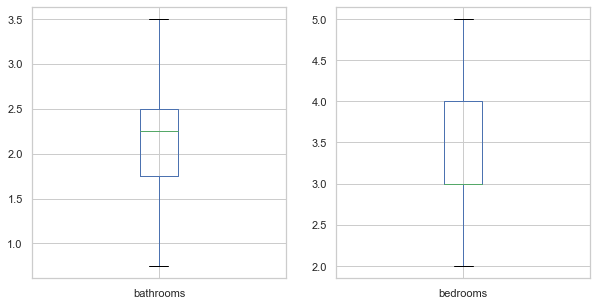

In [56]:
fig, axs = plt.subplots(1, 2)
df_copy.boxplot(column=['bathrooms'],ax=axs[0]);
df_copy.boxplot(column=['bedrooms']);

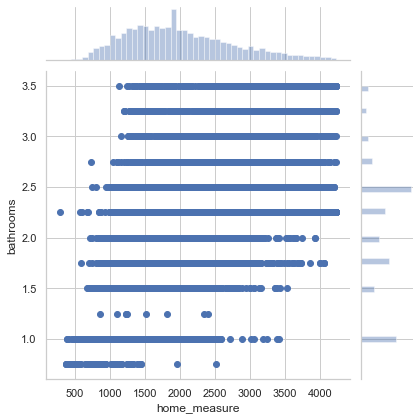

In [57]:
sns.jointplot(x='home_measure',y = 'bathrooms',data = df_copy, kind = 'scatter')


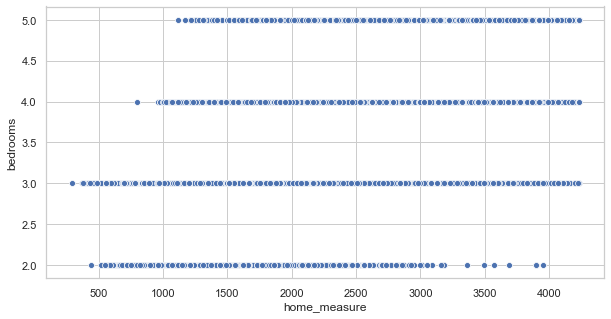

In [58]:
sns.scatterplot(x='home_measure',y = 'bedrooms',data = df_copy)

The number of bedrooms and bathrooms are now proportional to the home measure

> Treating outliers on the house measurements

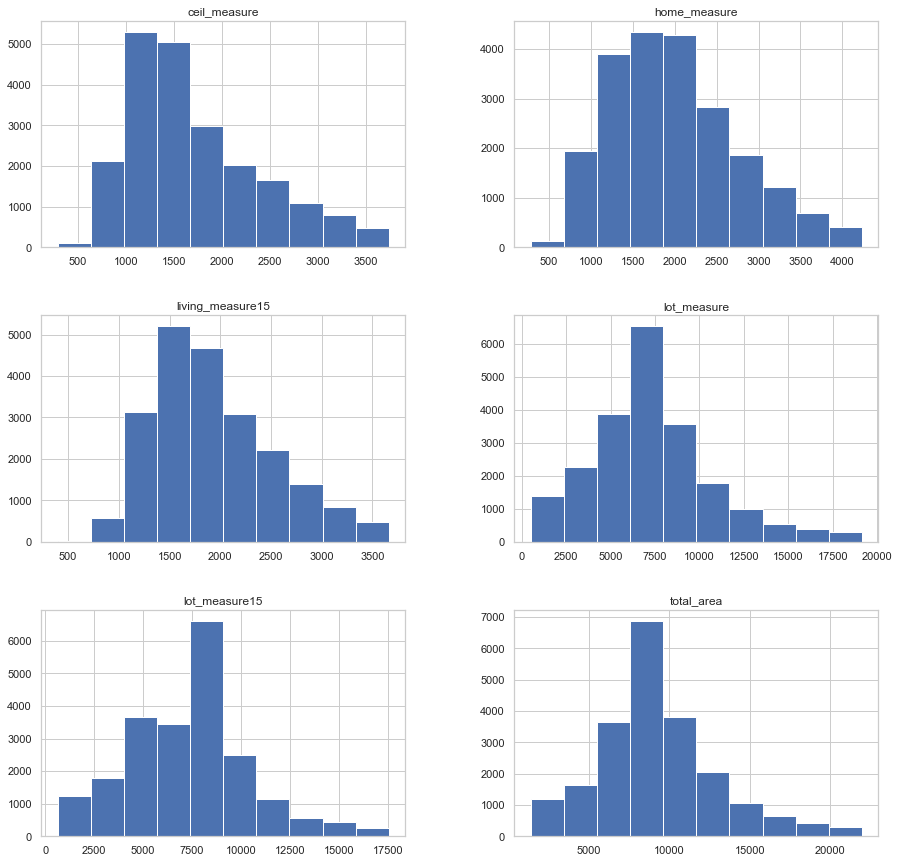

In [59]:
df_copy.hist(column=['home_measure','living_measure15','lot_measure','lot_measure15','ceil_measure','total_area'],figsize=(15,15));

> The home measurements now have near normal distributions.

> Home measure could be a good predictor of the price, but because there isnt't sufficient data for house with a  higher price   range, the prices above the Maximum range have been. replaced with the median value

# Realationship between price and numeric features

In [60]:
from scipy import stats

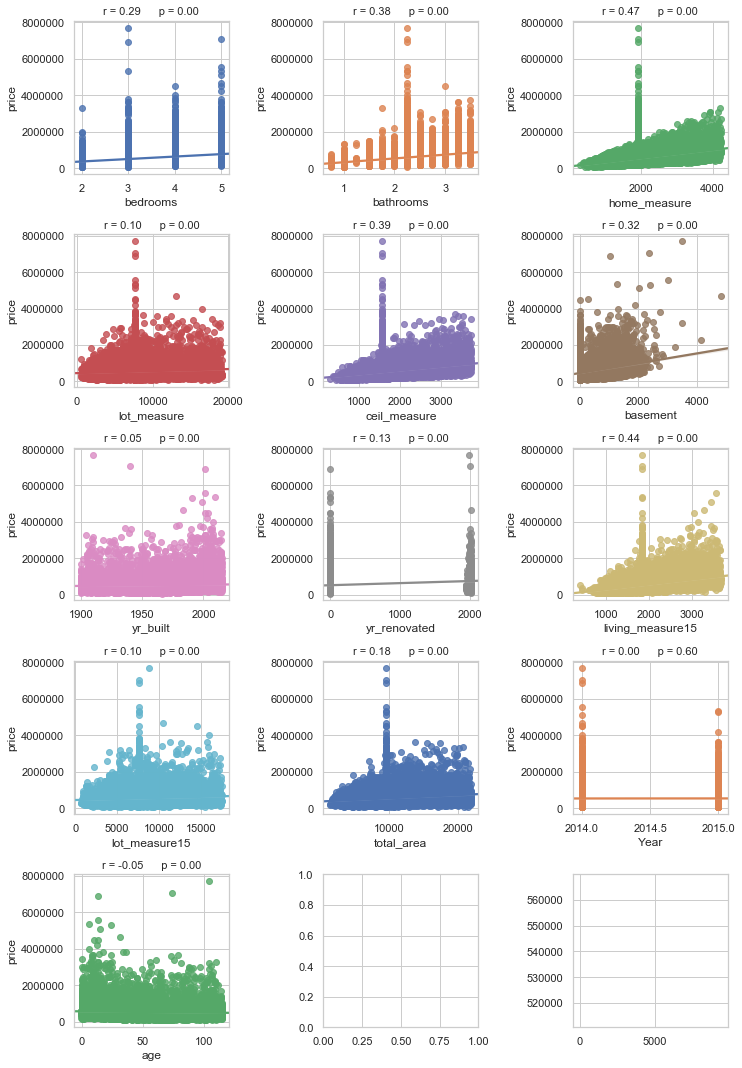

In [61]:
nr_rows = 5
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_features)
li_not_plot = ['lat', 'price', 'long','zipcode']
li_plot_num_feats = [c for c in list(numerical_features) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_copy[li_plot_num_feats[i]], df_copy['price'], ax = axs[r][c])
            stp = stats.pearsonr(df_copy[li_plot_num_feats[i]], df_copy['price'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
plt.tight_layout()

> Age : the age feature extracted from the date does not serve much purpose.
        The price in the data provided does not depende on how old the house is.
        Proceeding the remove this extra feature.
        
> Important features from the statistical perspective : Apart from home_measure,ceil_measure,basement,living_measure15,bedrooms none of the features seem to be affecting price linearly or in any trend

>An indication that, linear models may not be suitable for this set of data.

In [62]:
df_copy = df_copy.drop(columns = ['age','SHAPE'],axis = 1)

# Heatmap
heatmap of the entire dataframe to check for multicolinearity and their correlation with the price.

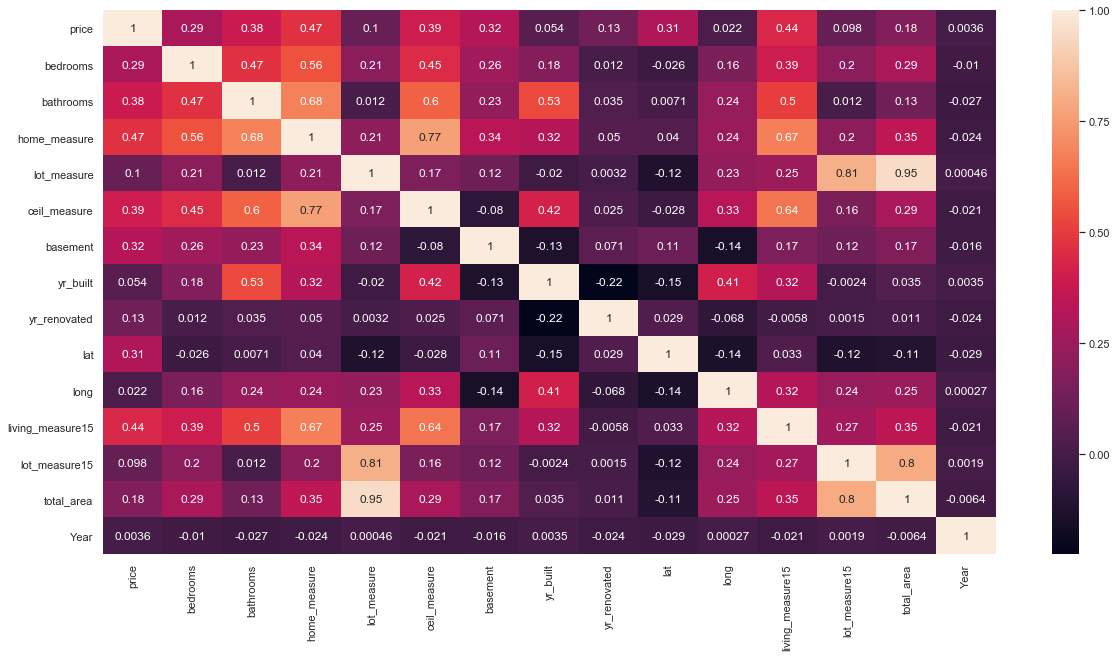

In [63]:
cor2 = df_copy.corr()
fig, ax = plt.subplots(figsize= (20, 10))
sns.heatmap(cor2, annot= True)

In [64]:
#Correlation with output variable
cor_target = abs(cor2["price"])
#Selecting highly correlated features
relevant_features_1 = cor_target[cor_target>0.5]
relevant_features_1

price    1.0
Name: price, dtype: float64

> With respect to the first heatmap and the second,

> following features affect 'price' positively:

bathrooms           

home_measure        

quality             

ceil_measure      

living_measure15    

furnished          


MULTICOLINEARITY has been observed between:

> total_area and lot_measure

> home_measure and ceil_measure,living_measure15,bathrooms,bedrooms --- these will be dropped down the line or transformed.

# Preparing the data for algorithms 

In [65]:
# dropping sale date and the year 
df_copy = df_copy.drop(columns=['sale_date','Year','lot_measure','ceil_measure'], axis=1)

#dropping lot_measure due to its high collinearity with total_area

#dropping ceil_measure due its high colinearity with home_measure

In [66]:
#Seperating the dependant target feature from the independent features
Target = df_copy.price

In [67]:
df_copy = df_copy.drop('price', axis = 1)

In [68]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
bedrooms             21613 non-null float64
bathrooms            21613 non-null float64
home_measure         21613 non-null float64
floors               21613 non-null category
coast_view           21613 non-null category
viewed               21613 non-null category
overall_condition    21613 non-null category
quality              21613 non-null category
basement             21613 non-null int64
yr_built             21613 non-null int64
yr_renovated         21613 non-null int64
zipcode              21613 non-null category
lat                  21613 non-null float64
long                 21613 non-null float64
living_measure15     21613 non-null float64
lot_measure15        21613 non-null float64
furnished            21613 non-null category
total_area           21613 non-null float64
dtypes: category(7), float64(8), int64(3)
memory usage: 2.0 MB


In [69]:
#Applying Z score to scale the data
from scipy.stats import zscore

df_copy_z = df_copy.apply(zscore)

In [70]:
# Lets convert it into a dataframe
df_copy_z = pd.DataFrame(df_copy_z, columns = df_copy.columns)

# A check on the values after zscore
df_copy_z.head(3)

,bedrooms,bathrooms,home_measure,floors,coast_view,viewed,overall_condition,quality,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,0.834543,1.749928,1.348691,-0.915427,-0.087173,-0.305759,2.444294,1.142667,-0.658681,-0.510853,-0.210128,1.029090,1.135587,-0.867059,0.323637,0.086149,2.020944,1.915614
1,0.834543,0.643226,0.729324,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,1.148964,0.170051,-0.210128,-1.026840,-1.757734,-1.222109,0.561078,0.493638,-0.494818,0.176448
2,-0.427755,0.643226,0.492120,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.658681,1.191407,-0.210128,-0.746486,-1.505137,1.525981,0.747639,-0.961168,-0.494818,-0.731696


In [71]:
# Splitting the data into train, test and validation sets
from sklearn.model_selection import train_test_split

X = df_copy_z
y = Target

#Splitting the original dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

CALCULATING FEATURE IMPORTANCE USING DECISION TREE REGRESSOR

In [72]:
from sklearn.tree import DecisionTreeRegressor

innercity_DTreg_model = DecisionTreeRegressor()

# Now lets fit the scaled data into model
innercity_DTreg_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [73]:
# Lets check on feature importance
print(pd.DataFrame(innercity_DTreg_model.feature_importances_ , columns = ['Importance'], index = X_train.columns))

                   Importance
bedrooms             0.005728
bathrooms            0.004386
home_measure         0.083125
floors               0.003242
coast_view           0.035065
viewed               0.016933
overall_condition    0.004510
quality              0.475009
basement             0.019463
yr_built             0.049615
yr_renovated         0.002621
zipcode              0.026040
lat                  0.147577
long                 0.080000
living_measure15     0.019089
lot_measure15        0.010747
furnished            0.000000
total_area           0.016852


>Based on feature importance we found below features to be useful in price prediction of the house,

living_measure,

sight,

quality,

yr_built,

lat,

long,

living_measure15,

In [74]:
# Now lets us check the model performance on the test set
innercity_DTreg_model.score(X_val, y_val)

0.7059966480879308

In [75]:
# Lets check if the model is overfitting in train data
innercity_DTreg_model.score(X_train, y_train)

0.9993339083054352

We can see that with training data the model is performing very well, hence it is overfitting.

As we have not restricted the Decision Tree it has over grown( min_samples_leaf=1 ) and hence the overfitting.

Also there are more features which are not that important are also considered in our initial model, that also causes oberfitting. 

In [76]:
# Lets drop some of the less important columns from the dataframe and fit the model again to see if it performs better.

drop_col_list = ['bedrooms', 'bathrooms', 'furnished', 'floors', 'overall_condition', 'basement', 'yr_renovated', 
                 'zipcode', 'lot_measure15', 'total_area']

df_copy_z = df_copy_z.drop(labels = drop_col_list, axis = 1)

In [77]:
# Now lets again try to fit the model and check on score
X = df_copy_z

#Splitting the original dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Lets set min_samples_leaf value to control the tree
innercity_DTreg_model = DecisionTreeRegressor(min_samples_leaf = 20)

# Now lets fit the scaled data into model
innercity_DTreg_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [78]:
# Lets check on feature importance
print(pd.DataFrame(innercity_DTreg_model.feature_importances_ , columns = ['Importance'], index = X_train.columns))

                  Importance
home_measure        0.093468
coast_view          0.000000
viewed              0.016019
quality             0.580504
yr_built            0.032144
lat                 0.171242
long                0.090614
living_measure15    0.016009


We can see that living_measure, quality and lat importance levels have increased;

where as coast's importance level has dropped to 0.

In [79]:
# Now lets us check the model performance on the test set
innercity_DTreg_model.score(X_val, y_val)

0.7526686907995317

In [80]:
# Lets check if the model is overfitting in train data
innercity_DTreg_model.score(X_train, y_train)

0.8090110544541345

As we see the score is improved after dropping less important features from the dataframe.

No signs of overfitting

In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

# Lets try to fit model using the new dimensions created.
# Lets split the data for model
#X_train, X_test, y_train, y_test = train_test_split(df_copy_z, Target, test_size = 0.3, random_state = 1)

model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10) 
                 }
    
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

    # Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
print("\n ========================================================")
    


 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.3943486994353439, loss='ls',
                          max_depth=6, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=797,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.9292995096668162,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

 The best score across ALL searched params:
 0.7903063130520885

 The best parameters across ALL searched params:
 {'learning_rate': 0.3943486994353439, 'max_depth': 6, 'n_estimators': 797, 'subsample': 0.9292995096668

In [82]:
#get_modelname extracts the name of the model from the model function call. 
#For support vector regression, the kernel name is also prepended to the model name.
def get_modelname(model):
    name = str(model).partition('(')[0]
    if name=='SVR':
        name = model.get_params()['kernel'] + name
    return(name)

In [83]:
#The evalModels function includes the following:
#A pipeline that includes standardization of the input vectors (so that variance is 1 and mean is zero) and application of the ML model.
#8-split, shuffled cross-validation
#Box plotting all the performance results

def evalModels(models, Xw, y, boxPlotOn=True):
    from sklearn.preprocessing import StandardScaler # Standardize data (0 mean, 1 stdev)
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline, make_pipeline

    scoring = 'r2'  #'neg_mean_squared_error'
    modelnames = []
    results = []
    for model in models:
        pipe = make_pipeline( StandardScaler(), model )
        kfold = KFold(n_splits=8, random_state=6, shuffle=True)
        cv_results = cross_val_score(pipe, Xw, y, cv=kfold, scoring=scoring)
        modelname = get_modelname(model)
        print( "%s: %.3f %.3f" %(modelname, cv_results.mean(), cv_results.std()))
        modelnames.append(modelname)
        results.append(cv_results)
    
    if boxPlotOn:
        import matplotlib.pyplot as plt
        # boxplot algorithm comparison
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results, showmeans=True)
        ax.set_xticklabels(modelnames, fontsize=9)
        plt.ylim(0.4, 0.95)
        plt.show()
    
    return(results)

LinearRegression: 0.641 0.016
Ridge: 0.641 0.016
Lasso: 0.641 0.016
ElasticNet: 0.640 0.017


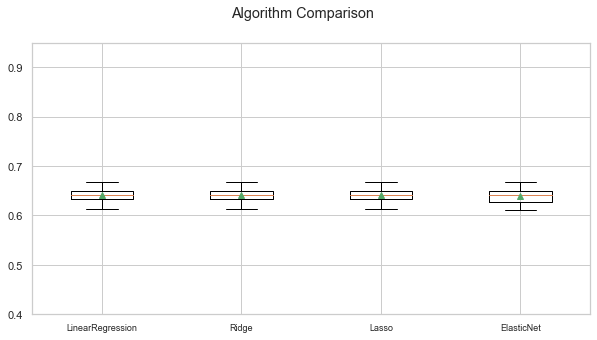

In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# create and evaluate pipeline
models = []
models.append( LinearRegression() )
models.append( Ridge(alpha=1.0) )
models.append( Lasso(alpha=0.5) )
models.append( ElasticNet(alpha=0.1, l1_ratio=0.5) )

# Lets seperate the dependant and independant variables
X = df_copy
y = Target

Xw = X
results = evalModels(models, Xw, y, boxPlotOn=True)

linearSVR: 0.436 0.022
polySVR: -0.021 0.005
sigmoidSVR: -0.059 0.005
rbfSVR: -0.010 0.004
KNeighborsRegressor: 0.752 0.026


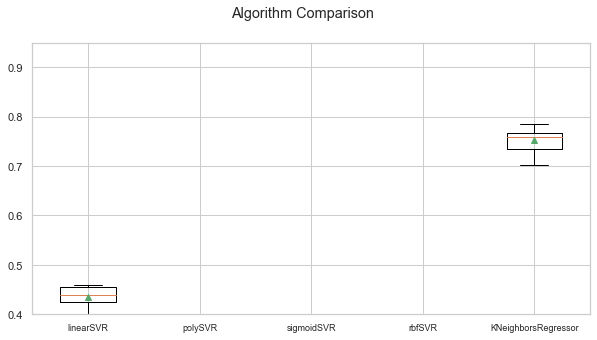

In [85]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# create and evaluate pipeline
models = []
models.append( SVR(kernel='linear', C=10, epsilon=0.3, shrinking=False) )
models.append( SVR(kernel='poly', C=4, epsilon=0.1, degree=1) )
models.append( SVR(kernel='sigmoid', C=0.2) )
models.append( SVR(kernel='rbf', C=20, epsilon=1.5) )
models.append( KNeighborsRegressor(weights='distance', p=2) )

Xw = X
results = evalModels(models, Xw, y, boxPlotOn=True)

DecisionTreeRegressor: 0.620 0.022
ExtraTreeRegressor: 0.670 0.039
BaggingRegressor: 0.821 0.019
RandomForestRegressor: 0.860 0.018


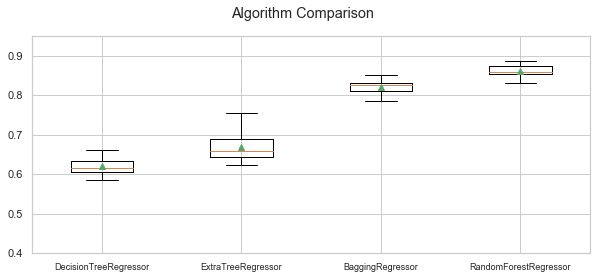

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor


# create and evaluate pipeline
models = []
models.append( DecisionTreeRegressor(max_leaf_nodes=9, min_samples_leaf=18) )
models.append( ExtraTreeRegressor(criterion='mae', max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=6) )
cart = DecisionTreeRegressor()
models.append( BaggingRegressor(base_estimator=cart, random_state=7, n_estimators=300, max_features=6) )
models.append(RandomForestRegressor(n_estimators = 100, random_state = 0))
Xw = X
plt.rcParams["figure.figsize"] = [10, 4]
results = evalModels(models, Xw, y, boxPlotOn=True)
plt.rcParams["figure.figsize"] = [6, 4]

In [87]:
gbmtree=GradientBoostingRegressor(n_estimators=50)
gbmtree.fit(X_train,y_train)
print(gbmtree.score(X_train,y_train))
print(gbmtree.score(X_val,y_val))

0.836744110180063
0.8172697410130243


# Conclusions for Milestone 1


Following are the  cross validation scores without the hyperparameter tuning:

                                                     Linear models and KNN:
                                                     

| LinearRegression | Ridge  | Lasso  | ElasticNet  | KNeighborsRegressor  |
| --- | --- | --- | --- | --- |
| 0.642 | 0.642 | 0.642 | 0.640 | 0.751 |


                                                           SVR:
                                                         Kernel as :
                                                                                                     

| Linear  | Poly  | Sigmoid  | rbf  |
| --- | --- | --- | --- |
| 0.0.437 | -0.022 | -0.059 | -0.011 |




                                                     CART and Ensemble:
                                                     
                                                     
                                                  

| DecisionTreeRegressor  | ExtraTreeRegressor  | BaggingRegressor  | GradientBoostingRegressor  |RandomForestRegressor |
| --- | --- | --- | --- | --- |
| 0.620 | 0.675 | 0.821 | 0.815 | 0.860 |

# Models chosen as a baseline

TOP 3 Algorithms:


| Gradient Boosting | Bagging | Random Forest |
| --- | --- | --- |
| 0.815| 0.821 | 0.860 |

We can do performance tuning on GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor to get better score on the house price predictions. We will try different values for the parameters of this algorithm to improve the performance of the model.

# Hyper-parameter Tuning

1.Each parameter in the respective algorithms will be put through Grid Search cross validation .
To obtain its optimal value.

2.Each of these parameters are then going to be put together and tested on the validation dataset.

3.tweaked values of the parametes for a better fit are then tested out again on the validation dataset.

4.The Algorithms once, at a satisfactory level of fit are then used, to test the TEST dataset , which has so far been kept hidden from the algorithms, for a final test.

5.The best algorithm is then chosen.

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Tuning Gradient Boosting Algorithm

In [89]:
# Tuning n_estimators

Parameter_1 = {'n_estimators':range(10,200,10)}
Gb_Gsearch = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = Parameter_1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Gb_Gsearch.fit(X_train,y_train)
print('Optimal parameters are :', Gb_Gsearch.best_params_)
Gb_Gsearch.cv_results_, Gb_Gsearch.best_params_, Gb_Gsearch.best_score_

Optimal parameters are : {'n_estimators': 190}


({'mean_fit_time': array([0.11110272, 0.09295063, 0.1352365 , 0.16814885, 0.20465045,
         0.30239062, 0.35025864, 0.34686737, 0.40132084, 0.44062734,
         0.5756557 , 0.68177562, 0.59401026, 0.64946313, 0.67100635,
         0.88702927, 1.03543668, 0.95453691, 0.95610209]),
  'std_fit_time': array([0.02363993, 0.01212371, 0.0115563 , 0.00654375, 0.01012011,
         0.02648008, 0.02160557, 0.00725912, 0.00936142, 0.01899685,
         0.11490467, 0.04797466, 0.02241274, 0.02699383, 0.02482826,
         0.09083125, 0.08178687, 0.03092254, 0.02511241]),
  'mean_score_time': array([0.00239344, 0.00339093, 0.00418859, 0.0053854 , 0.00598378,
         0.00857973, 0.00897598, 0.00957379, 0.0103724 , 0.01056457,
         0.01396108, 0.01376348, 0.0139679 , 0.01475954, 0.01555748,
         0.01834908, 0.01854763, 0.01934967, 0.01835032]),
  'std_score_time': array([4.88460925e-04, 4.88791967e-04, 3.99089127e-04, 4.88811350e-04,
         1.08106461e-06, 7.97941030e-04, 8.92231527e-04, 7.

In [90]:
#tuning max_depth and min_samples_split

param_test2 = {'max_depth':range(5,50,2), 'min_samples_split':range(100,1001,200)}
Gb_Gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=190, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Gb_Gsearch2.fit(X_train,y_train)
Gb_Gsearch2.cv_results_, Gb_Gsearch2.best_params_, Gb_Gsearch2.best_score_

({'mean_fit_time': array([0.68564181, 0.67252321, 0.66082253, 0.63964653, 0.63432355,
         0.91315546, 0.83406339, 0.75509772, 0.72949653, 0.6848979 ,
         1.13466959, 0.94837074, 0.91850066, 0.91765141, 0.87205586,
         1.47130928, 1.28857808, 1.21060643, 1.1639205 , 1.11467757,
         1.76802573, 1.39810314, 1.33264132, 1.24124141, 1.30963964,
         1.79239326, 1.51298466, 1.44162092, 1.34197383, 1.27087741,
         2.0007854 , 1.69867196, 1.50317922, 1.5242547 , 1.23382063,
         1.8910243 , 1.59398894, 1.52454977, 1.30571551, 1.21292157,
         2.15290251, 1.70284595, 1.56284556, 1.4364573 , 1.35194898,
         2.29020009, 1.79518199, 1.58903685, 1.40684786, 1.29534407,
         2.60337467, 2.18385658, 1.71949749, 1.68990717, 1.59014392,
         2.88591623, 2.2223434 , 2.020609  , 1.73308787, 1.59176006,
         3.10692592, 2.55101709, 2.20539646, 2.02438898, 1.59120169,
         3.44330826, 2.45066304, 1.85152946, 1.6481997 , 1.49550014,
         2.710471

In [91]:
#tuning min_sample_split and min_sample_leaf

param_test3 = {'min_samples_split':range(100,2100,200), 'min_samples_leaf':range(30,71,10)}
Gb_Gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=190,max_depth=17,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Gb_Gsearch3.fit(X_train,y_train)
Gb_Gsearch3.cv_results_, Gb_Gsearch3.best_params_, Gb_Gsearch3.best_score_

({'mean_fit_time': array([1.76768618, 1.55549474, 1.30852089, 1.15201778, 1.27438555,
         1.18433867, 1.07238326, 1.09635673, 1.03812757, 0.98443933,
         1.80219736, 1.51814919, 1.21782646, 1.15043344, 1.04223704,
         1.05970283, 1.07294583, 1.05834279, 0.984201  , 0.91095543,
         1.721978  , 1.49881167, 1.34626503, 1.22623124, 1.18978744,
         1.09826593, 1.11839008, 1.04359961, 0.92885156, 0.89553957,
         1.69229016, 1.42430253, 1.34703264, 1.2836875 , 1.10664401,
         0.96332412, 0.82849407, 0.7745142 , 0.72515244, 0.72886186,
         1.26927028, 1.16890845, 1.15422421, 1.14221072, 1.11803708,
         1.02828732, 0.97076406, 0.81118116, 0.74382005, 0.69531326]),
  'std_fit_time': array([0.04743983, 0.02297388, 0.06157897, 0.03340031, 0.04144688,
         0.0090025 , 0.02151715, 0.03725608, 0.02181692, 0.02999079,
         0.0502999 , 0.05400721, 0.02343765, 0.05113559, 0.01428673,
         0.04500994, 0.05135427, 0.03208387, 0.02539321, 0.02221046,

In [93]:
#tuning subsample

param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
Gb_Gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=190,max_depth=17,min_samples_split=100, min_samples_leaf=30, subsample=0.8, random_state=10,max_features='sqrt'),
param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Gb_Gsearch5.fit(X_train,y_train)
Gb_Gsearch5.cv_results_, Gb_Gsearch5.best_params_, Gb_Gsearch5.best_score_

({'mean_fit_time': array([1.26302371, 1.28197165, 1.3914773 , 1.37133369, 1.38669181,
         1.3356287 ]),
  'std_fit_time': array([0.05490865, 0.03058191, 0.02156208, 0.03941717, 0.0070688 ,
         0.05560152]),
  'mean_score_time': array([0.03490644, 0.03530636, 0.03570471, 0.03650212, 0.03670177,
         0.03470712]),
  'std_score_time': array([0.00154514, 0.00241022, 0.00074593, 0.00048852, 0.00074638,
         0.0009771 ]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([-2.41695826e+10, -2.36431534e+10, -2.39989057e+10, -2.34654104e+10,
         -2.38488153e+10, -2.29780086e+10]),
  'split1_test_score': array([-2.68706089e+10, -2.65681431e+10, -2.64698778e+

In [94]:
Gbr_tuning = GradientBoostingRegressor(learning_rate=0.1, n_estimators=190,max_depth=11,min_samples_split=1200, min_samples_leaf=30, subsample=0.9, random_state=10,max_features=0.5)
Gbr_tuning.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=11,
                          max_features=0.5, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=30, min_samples_split=1200,
                          min_weight_fraction_leaf=0.0, n_estimators=190,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
Gbr_score = Gbr_tuning.score(X_train,y_train)
Gbr_predicted = Gbr_tuning.predict(X_val)

print('R2 sq: ',Gbr_score)


R2 sq:  0.8832285764665645


In [97]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, Gbr_predicted))
print("R-squared for Train: %.2f"%Gbr_tuning.score(X_train, y_train))
print("R-squared for validation set: %.2f"%Gbr_tuning.score(X_val, y_val)) 
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, Gbr_predicted))

Mean squared error: 16995124017.85
R-squared for Train: 0.88
R-squared for validation set: 0.87
Test Variance score: 0.87


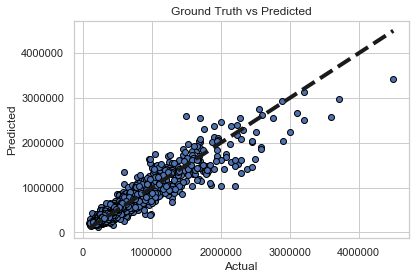

In [98]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_val, Gbr_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

Gradient Boosting Regressor :

R-squared for Train: 0.89

R-squared for validation set: 0.87

# Tuning Random Forest Regressor Algorithm

In [100]:
Parameter_rf2 = {'n_estimators':range(50,1000,10)}
Rf_Gsearch2 = GridSearchCV(estimator = RandomForestRegressor(random_state = 0, max_features ='log2'), 
param_grid = Parameter_rf2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Rf_Gsearch2.fit(X_train,y_train)
print('Optimal parameters are :', Rf_Gsearch2.best_params_)
Rf_Gsearch2.cv_results_, Rf_Gsearch2.best_params_, Rf_Gsearch2.best_score_

Optimal parameters are : {'n_estimators': 550}


({'mean_fit_time': array([ 0.83416376,  1.07234612,  1.30671177,  1.45949912,  1.56940432,
          1.92525315,  2.03615956,  2.11414995,  2.61520972,  2.75384369,
          2.62099342,  3.01713467,  3.04665685,  3.01833291,  3.61793361,
          3.72384768,  3.5917984 ,  3.99212956,  4.4766397 ,  4.14851494,
          5.10555239,  5.84587755,  6.01543236,  5.79403262,  6.11234579,
          6.26527429,  6.33005233,  6.0884892 ,  6.25878816,  6.48048306,
          7.24450927,  7.19216938,  7.12040758,  7.68630829,  7.99529362,
          8.40632825,  8.52504535,  8.91542516,  8.74644232,  9.05073514,
          9.4191896 ,  9.61420088,  9.77086453,  9.90599914, 10.25314932,
         10.48240571, 10.74450512, 10.74043169, 10.75405068, 11.63141031,
         11.91405563, 10.87777696, 10.83384347, 11.75439663, 13.25201936,
         12.82404194, 12.39149113, 12.1897119 , 12.48143988, 12.46936264,
         13.47371364, 13.29402976, 13.5095974 , 14.95900211, 14.47379565,
         13.34518175,

In [101]:
Parameter_rf3 = {'min_samples_split':range(50,2100,100), 'min_samples_leaf':range(20,200,10)}
Rf_Gsearch3 = GridSearchCV(estimator = RandomForestRegressor(random_state = 0, max_features ='log2',n_estimators = 140), 
param_grid = Parameter_rf3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Rf_Gsearch3.fit(X_train,y_train)
print('Optimal parameters are :', Rf_Gsearch3.best_params_)
Rf_Gsearch3.cv_results_, Rf_Gsearch3.best_params_, Rf_Gsearch3.best_score_

Optimal parameters are : {'min_samples_leaf': 20, 'min_samples_split': 50}


({'mean_fit_time': array([1.22996945, 1.04643893, 0.95216126, 0.87228403, 0.81070251,
         0.77875314, 0.73436236, 0.69475265, 0.66960011, 0.65419416,
         0.62672687, 0.60968442, 0.62616348, 0.58430457, 0.57495928,
         0.53131661, 0.5651639 , 0.58058386, 0.56518126, 0.45209227,
         0.41309404, 1.14750071, 0.99956217, 0.90058808, 0.87294159,
         0.8132865 , 0.80132394, 0.76208673, 0.72640853, 0.64786711,
         0.63191457, 0.60158548, 0.56588688, 0.57306681, 0.54354868,
         0.63131094, 0.57127118, 0.55039902, 0.61977162, 0.6011622 ,
         0.60510726, 0.59405594, 1.15995669, 1.04276648, 0.9762845 ,
         0.87938409, 0.84213505, 0.80148931, 0.76559448, 0.71932287,
         0.68981309, 0.67625074, 0.65111313, 0.65836954, 0.5908185 ,
         0.60364575, 0.57102342, 0.55801468, 0.53738651, 0.54736276,
         0.52614651, 0.50087118, 0.49255652, 1.09146719, 1.01734719,
         0.96950607, 0.9495585 , 0.83082042, 0.7739852 , 0.77113061,
         0.722569

In [102]:
Parameter_rf4 = {'random_state':range(0,200,10)}
Rf_Gsearch4 = GridSearchCV(estimator = RandomForestRegressor( max_features ='log2',n_estimators = 140), 
param_grid = Parameter_rf4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Rf_Gsearch4.fit(X_train,y_train)
print('Optimal parameters are :', Rf_Gsearch4.best_params_)
Rf_Gsearch4.cv_results_, Rf_Gsearch4.best_params_, Rf_Gsearch4.best_score_

Optimal parameters are : {'random_state': 170}


({'mean_fit_time': array([2.77666502, 2.8317122 , 2.81835575, 2.9375504 , 2.84038901,
         2.7985209 , 2.8280736 , 2.79283915, 2.8040184 , 2.82839336,
         2.76491818, 2.76443467, 2.80385981, 2.77802887, 2.83947797,
         2.85496879, 2.75973687, 2.78324256, 2.76983833, 2.79301572]),
  'std_fit_time': array([0.04392133, 0.04220122, 0.07238496, 0.06672131, 0.05530289,
         0.04220974, 0.02902302, 0.03865984, 0.01885441, 0.0861496 ,
         0.04334843, 0.02007131, 0.02643304, 0.02842218, 0.02539885,
         0.05052749, 0.0299255 , 0.02728536, 0.03022116, 0.03196636]),
  'mean_score_time': array([0.10090179, 0.09864407, 0.10249286, 0.10542951, 0.09453239,
         0.09991598, 0.09542456, 0.09881806, 0.10214753, 0.09979153,
         0.0981823 , 0.10015635, 0.09751687, 0.10052433, 0.0971231 ,
         0.09706383, 0.09830122, 0.09838352, 0.1016521 , 0.09115343]),
  'std_score_time': array([0.00652583, 0.00357633, 0.00683169, 0.00570984, 0.00343488,
         0.00491349, 0.0023

In [103]:
rf_tuning = RandomForestRegressor( max_features =0.3,n_estimators = 550,min_samples_leaf =  5, min_samples_split =10,random_state = 170 ,oob_score = True,n_jobs = -1)
rf_tuning.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=-1,
                      oob_score=True, random_state=170, verbose=0,
                      warm_start=False)

In [104]:
rf_score = rf_tuning.score(X_train,y_train)
rf_predicted = rf_tuning.predict(X_val)

print('R2 sq: ',rf_score)

R2 sq:  0.8957503624363334


In [105]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, rf_predicted))
print("R-squared for Train: %.2f"%rf_tuning.score(X_train, y_train))
print("R-squared for validation set: %.2f"%rf_tuning.score(X_val, y_val)) 
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, rf_predicted))

Mean squared error: 18212944627.01
R-squared for Train: 0.90
R-squared for validation set: 0.87
Test Variance score: 0.87


Random Forest regressor :

R-squared for Train: 0.91

R-squared for validation set: 0.87

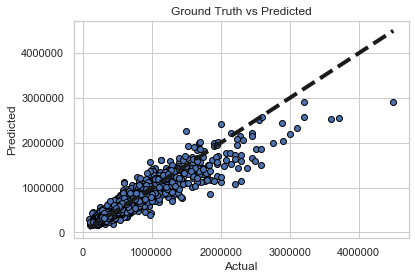

In [106]:
fig, ax = plt.subplots()
ax.scatter(y_val, rf_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# Tuning Bagging Regressor Algorithm

In [107]:
Parameter_br1 = {'n_estimators': range(50,1000,10)}
Br_Gsearch1 = GridSearchCV(estimator = BaggingRegressor(base_estimator=None, max_samples=1.0, max_features=1.0, bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=2), 
param_grid = Parameter_br1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
Br_Gsearch1.fit(X_train,y_train)
print('Optimal parameters are :', Br_Gsearch1.best_params_)
Br_Gsearch1.cv_results_, Br_Gsearch1.best_params_, Br_Gsearch1.best_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 330 for this parallel run (total 330)...
Building estimator 2 of 330 for this parallel run (total 330)...
Building estimator 3 of 330 for this parallel run (total 330)...
Building estimator 4 of 330 for this parallel run (total 330)...
Building estimator 5 of 330 for this parallel run (total 330)...
Building estimator 6 of 330 for this parallel run (total 330)...
Building estimator 7 of 330 for this parallel run (total 330)...
Building estimator 8 of 330 for this parallel run (total 330)...
Building estimator 9 of 330 for this parallel run (total 330)...
Building estimator 10 of 330 for this parallel run (total 330)...
Building estimator 11 of 330 for this parallel run (total 330)...
Building estimator 12 of 330 for this parallel run (total 330)...
Building estimator 13 of 330 for this parallel run (total 330)...
Building estimator 14 of 330 for this parallel run (total 330)...
Building estimator 15 of 330 for this parallel run (total 330)...
Building estimator 

Building estimator 129 of 330 for this parallel run (total 330)...
Building estimator 130 of 330 for this parallel run (total 330)...
Building estimator 131 of 330 for this parallel run (total 330)...
Building estimator 132 of 330 for this parallel run (total 330)...
Building estimator 133 of 330 for this parallel run (total 330)...
Building estimator 134 of 330 for this parallel run (total 330)...
Building estimator 135 of 330 for this parallel run (total 330)...
Building estimator 136 of 330 for this parallel run (total 330)...
Building estimator 137 of 330 for this parallel run (total 330)...
Building estimator 138 of 330 for this parallel run (total 330)...
Building estimator 139 of 330 for this parallel run (total 330)...
Building estimator 140 of 330 for this parallel run (total 330)...
Building estimator 141 of 330 for this parallel run (total 330)...
Building estimator 142 of 330 for this parallel run (total 330)...
Building estimator 143 of 330 for this parallel run (total 330

Building estimator 254 of 330 for this parallel run (total 330)...
Building estimator 255 of 330 for this parallel run (total 330)...
Building estimator 256 of 330 for this parallel run (total 330)...
Building estimator 257 of 330 for this parallel run (total 330)...
Building estimator 258 of 330 for this parallel run (total 330)...
Building estimator 259 of 330 for this parallel run (total 330)...
Building estimator 260 of 330 for this parallel run (total 330)...
Building estimator 261 of 330 for this parallel run (total 330)...
Building estimator 262 of 330 for this parallel run (total 330)...
Building estimator 263 of 330 for this parallel run (total 330)...
Building estimator 264 of 330 for this parallel run (total 330)...
Building estimator 265 of 330 for this parallel run (total 330)...
Building estimator 266 of 330 for this parallel run (total 330)...
Building estimator 267 of 330 for this parallel run (total 330)...
Building estimator 268 of 330 for this parallel run (total 330

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s finished


Optimal parameters are : {'n_estimators': 330}


({'mean_fit_time': array([ 2.47867103,  2.83596592,  3.34015331,  3.79878874,  4.26014171,
          4.75663486,  5.22682405,  5.65285859,  6.10145721,  6.52881021,
          7.947293  ,  7.75340791,  7.84268255,  8.23823094,  8.51032381,
          8.93283205,  9.45212994,  9.92970738, 10.23745842, 10.6572751 ,
         11.09474759, 11.59816213, 12.08590503, 12.46507421, 12.83438678,
         14.0834167 , 14.52251072, 14.46746464, 14.96337037, 15.39368353,
         15.66880603, 16.10558214, 16.6578527 , 17.02528329, 17.39041691,
         17.95245743, 18.19835019, 18.79265122, 19.30167131, 19.51627493,
         20.11561356, 20.44468894, 22.04151468, 20.99232635, 19.75959187,
         19.95070052, 20.24499264, 20.51701455, 22.98439178, 24.21219554,
         24.45281396, 25.99869823, 27.46034083, 28.91313362, 28.6480226 ,
         26.26379952, 28.96644287, 27.35599489, 27.24012632, 27.23481655,
         28.26565514, 27.99857168, 28.65455322, 29.79511094, 28.87289724,
         26.73833756,

In [108]:
Br_tuning = BaggingRegressor(base_estimator=cart,n_estimators = 230, max_samples=0.2, max_features=0.9, bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=0)
Br_tuning.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=0.9,
                 max_sample

In [109]:
Br_score = Br_tuning.score(X_train,y_train)
Br_predicted = Br_tuning.predict(X_val)

print('R2 sq: ',Br_score)

R2 sq:  0.8954115219813046


In [110]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_val, Br_predicted))
print("R-squared for Train: %.2f"%Br_tuning.score(X_train, y_train))
print("R-squared for validation set: %.2f"%Br_tuning.score(X_val, y_val)) 
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_val, Br_predicted))

Mean squared error: 17925857054.21
R-squared for Train: 0.90
R-squared for validation set: 0.87
Test Variance score: 0.87


Bagging regressor algorithm:

R-squared for Train: 0.89

R-squared for validation set: 0.87

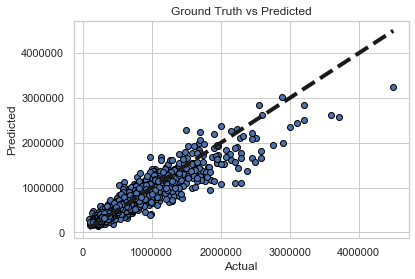

In [111]:
fig, ax = plt.subplots()
ax.scatter(y_val, Br_predicted, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# Applying the set  parameters to the test Dataset

GRADIENT BOOSTING REGRESSOR

In [112]:
Gbr_predicted_test = Gbr_tuning.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, Gbr_predicted_test))
print("R-squared for Train: %.2f"%Gbr_tuning.score(X_train, y_train))
print("R-squared for test set: %.2f"%Gbr_tuning.score(X_test, y_test)) 
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, Gbr_predicted_test))

Mean squared error: 21019825388.10
R-squared for Train: 0.88
R-squared for test set: 0.85
Test Variance score: 0.85


RANDOM FOREST REGRESSOR

In [113]:
rf_predicted_test = rf_tuning.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, rf_predicted_test))
print("R-squared for Train: %.2f"%rf_tuning.score(X_train, y_train))
print("R-squared for test set: %.2f"%rf_tuning.score(X_test, y_test)) 
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, rf_predicted_test))

Mean squared error: 22061771589.28
R-squared for Train: 0.90
R-squared for test set: 0.84
Test Variance score: 0.84


BAGGING REGRESSOR

In [114]:
Br_predicted_test = Br_tuning.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, Br_predicted_test))
print("R-squared for Train: %.2f"%Br_tuning.score(X_train, y_train))
print("R-squared for test set: %.2f"%Br_tuning.score(X_test, y_test)) 
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, Br_predicted_test))

Mean squared error: 21319732779.83
R-squared for Train: 0.90
R-squared for test set: 0.84
Test Variance score: 0.84


# Conclusion on the choice of algorithm:

Goodness of fit/Accuracy for the algorithms is as follows.

| Gradient Boosting | Bagging | Random Forest |
| --- | --- | --- |
| 0.85 >| 0.84> | 0.84 |

# Gradient Boosting is the algorithm of choice .

As:

> The performance/goodness of fit is better than rest of the two algorithms in comparison

> We have been able to tune it to perform better than its baseline/benchmark

# Model Evaluation

 > From initial observation it was notable that linear models would not perform as well. As strong linear relationship between    the target and independant variables was missing. Many assumptions that were necessary for the working of such models were      not being met with.

>  Ensemble models performed much better than the indivisual models without any tuning.

> COMPARISON TO BENCHMARK :
    Gradient Boosting had a strong start, with a fit of 0.815, right at the baseline/benchmark. After tuning, it exceeded the       accuracy set at the benchmark, better than the other two models namely, bagging and random forest regressors.

> Grid Search for each of the following parameters revealed that , following were the optimal values for the chosen parameters:

| learning_rate | n_estimators | max_depth | min_samples_split | min_samples_leaf | subsample | random_state | max_features |
|--- |--- |--- |--- |--- |--- |--- |--- | 
|0.1 |190 |11 |1200 |30 |0.9 |10 |0.5 |
 
 
 > R^2 was used to measure the performace of the model. The results of which are printed above.

# Implications and limitations

> The dataset provided has imbalances in the various features provided, in order to deal with the said imbalances, the data was narrowed down to suit to make predictions for price ranges falling in the category of the average.

>This particular model is suited for price ranges near and below 10,00,000 USD.

LIMITATIONS: 

> The model may not predict well for a high price range, i.e., ranges above 10,00,000 USD. A well dataset that contains enough information for a wide range of price ranges may be fed to the model to enhance its performance.

# Reflections:

>  This project was excellent for refreshing the overall knowledge obtained from the course on Regression.

>  We learned quite a few new libraries , such as the ones dealing with mapping, geographical locations;
   New techniques in existing libraries for visualisations.
   
> Dealing with the dataset, getting to know it in and out and finding hidden insights that may help the project in many other     ways , was one of the main learnings of this process.

> Next time though, we look dig deeper into the concepts and the mathematics behind each process, strive to bring out compelling visualizations and more.
